#  RFM Segmentation  

**Libraries**

In [1]:
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Load df

In [2]:
df = pd.read_csv('sales_data.csv', parse_dates=['OrderDate', 'ProcuredDate', 
                                                'DeliveryDate', 'ShipDate'])

In [3]:
#print df
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [4]:
df.shape

(7991, 16)

In [5]:
#General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n

In [6]:
#check null values
df.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
dtype: int64

In [7]:
#composition of df
df.nunique()

OrderNumber         7991
Sales Channel          4
WarehouseCode          6
ProcuredDate          11
OrderDate            945
ShipDate             966
DeliveryDate         966
CurrencyCode           1
_SalesTeamID          28
_CustomerID           50
_StoreID             367
_ProductID            47
Order Quantity         8
Discount Applied       7
Unit Price           664
Unit Cost           5252
dtype: int64

### Data Prep

In [8]:
#create sales column

df['sales'] = (df['Unit Price'] - df['Unit Cost'] - df['Discount Applied']) * df['Order Quantity']

df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,sales
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,4809.220
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,1772.595
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,994.230
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,6881.104
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,2769.248


In [9]:
#columns
cols = ['_CustomerID', 'OrderDate','sales']

#select data
data = df[cols].copy()

#rename columns
data.columns = ['CustomerID', 'OrderDate','sales']
data.head()

,CustomerID,OrderDate,sales
0,15,2018-05-31,4809.220
1,20,2018-05-31,1772.595
2,16,2018-05-31,994.230
3,48,2018-05-31,6881.104
4,49,2018-05-31,2769.248


In [10]:
data.shape

(7991, 3)

In [11]:
#check if the data have negative values 
data.query('sales <0')

,CustomerID,OrderDate,sales


In [12]:
#check max data
data['OrderDate'].max(), data['OrderDate'].min()

(Timestamp('2020-12-30 00:00:00'), Timestamp('2018-05-31 00:00:00'))

## RFM

In [13]:
#calculate recency
recency = data.groupby('CustomerID', as_index = False)['OrderDate'].max()
recency.columns = ['CustomerID', 'Last_purchases']
last_purchases = recency['Last_purchases'].max()
recency['recency'] = (last_purchases -  recency['Last_purchases']).dt.days
recency.head(2)

,CustomerID,Last_purchases,recency
0,1,2020-12-23,7
1,2,2020-12-23,7


In [14]:
#calculate Frequency
frequency = data.groupby('CustomerID', as_index = False)['OrderDate'].count()
frequency.columns = ['CustomerID', 'frequency']

frequency.head(2)

,CustomerID,frequency
0,1,152
1,2,135


In [15]:
#calculate Monetary
monetary = data.groupby('CustomerID', as_index = False)['sales'].sum()
monetary.columns = ['CustomerID', 'monetary']

monetary.head(2)

,CustomerID,monetary
0,1,483123.679
1,2,494281.177


In [16]:
#merge all df
rfm = recency.merge(frequency, on= 'CustomerID')
rfm = rfm.merge(monetary, on= 'CustomerID')
rfm - rfm.reset_index()
rfm.head()

,CustomerID,Last_purchases,recency,frequency,monetary
0,1,2020-12-23,7,152,483123.679
1,2,2020-12-23,7,135,494281.177
2,3,2020-12-22,8,181,669832.444
3,4,2020-12-27,3,167,728005.258
4,5,2020-12-02,28,159,628622.360


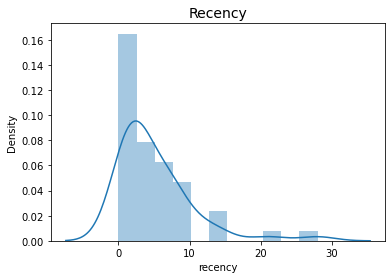

In [17]:
sns.distplot(rfm['recency']).set_title('Recency', fontsize = 14);

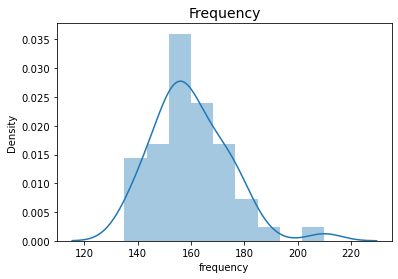

In [18]:
sns.distplot(rfm['frequency']).set_title('Frequency', fontsize = 14);

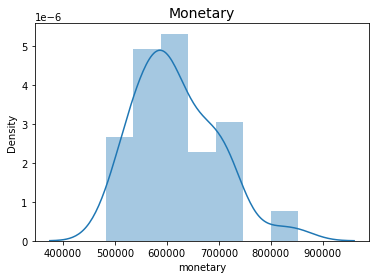

In [19]:
sns.distplot(rfm['monetary']).set_title('Monetary', fontsize = 14);

In [20]:
#split into segment using quantiles

q = rfm.quantile(q = [.25,.5,.75])
q = q.to_dict()
q

{'CustomerID': {0.25: 13.25, 0.5: 25.5, 0.75: 37.75},
 'recency': {0.25: 2.0, 0.5: 3.0, 0.75: 7.0},
 'frequency': {0.25: 151.25, 0.5: 157.5, 0.75: 167.75},
 'monetary': {0.25: 563803.6525, 0.5: 601013.9715, 0.75: 668818.844}}

In [21]:
#segmentation
def rscores(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else: 
        return 4

#segmentation
def fmscores(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else: 
        return 1

In [22]:
rfm['recency'].apply(rscores, args=('recency', q,)).head()

0    3
1    3
2    4
3    2
4    4
Name: recency, dtype: int64

In [38]:
#method 2 with pd.qcut 
pd.qcut(rfm['recency'], q = 4, labels=[1,2,3,4]).astype(int).head()

0    3
1    3
2    4
3    2
4    4
Name: recency, dtype: int32

In [42]:
#Create R columns 

rfm['r'] = pd.qcut(rfm['recency'], q = 4, labels=[1,2,3,4])
rfm.head()

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m
0,1,2020-12-23,7,152,483123.679,3,3,4
1,2,2020-12-23,7,135,494281.177,3,4,4
2,3,2020-12-22,8,181,669832.444,4,1,1
3,4,2020-12-27,3,167,728005.258,2,2,1
4,5,2020-12-02,28,159,628622.360,4,2,2


In [31]:
#Create F columns 

rfm['f'] = pd.qcut(rfm['frequency'], q = 4, labels=[4,3,2,1]).astypes(int)
rfm.head()

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m
0,1,2020-12-23,7,152,483123.679,3,3,4
1,2,2020-12-23,7,135,494281.177,3,4,4
2,3,2020-12-22,8,181,669832.444,4,1,1
3,4,2020-12-27,3,167,728005.258,2,2,1
4,5,2020-12-02,28,159,628622.360,4,2,2


In [41]:
#Create M columns 

rfm['m'] = pd.qcut(rfm['monetary'], q = 4, labels=[4,3,2,1])
rfm.head()

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m
0,1,2020-12-23,7,152,483123.679,3,3,4
1,2,2020-12-23,7,135,494281.177,3,4,4
2,3,2020-12-22,8,181,669832.444,4,1,1
3,4,2020-12-27,3,167,728005.258,2,2,1
4,5,2020-12-02,28,159,628622.360,4,2,2


In [43]:
#create a new columns first you gonna change the type and then maping to str

rfm['RFMGroup'] = rfm['r'].astype(int).map(str) + rfm['f'].astype(int).map(str)  + rfm['m'].astype(int).map(str)
rfm.head()

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup
0,1,2020-12-23,7,152,483123.679,3,3,4,334
1,2,2020-12-23,7,135,494281.177,3,4,4,344
2,3,2020-12-22,8,181,669832.444,4,1,1,411
3,4,2020-12-27,3,167,728005.258,2,2,1,221
4,5,2020-12-02,28,159,628622.360,4,2,2,422


In [46]:
#get the RFM score
rfm['RFMScore'] = rfm[['r', 'f', 'm']].sum(axis =1)
rfm.head()

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup,RFMScore
0,1,2020-12-23,7,152,483123.679,3,3,4,334,10
1,2,2020-12-23,7,135,494281.177,3,4,4,344,11
2,3,2020-12-22,8,181,669832.444,4,1,1,411,6
3,4,2020-12-27,3,167,728005.258,2,2,1,221,5
4,5,2020-12-02,28,159,628622.360,4,2,2,422,8


In [47]:
#Assign Loyalty Level to each customer
Loyalty = ['Platinum', 'Gold', 'Silver', 'Bornze']

rfm['RFM_Loyalty'] = pd.qcut(rfm['RFMScore'], q =4, labels=Loyalty)

rfm.head() 

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup,RFMScore,RFM_Loyalty
0,1,2020-12-23,7,152,483123.679,3,3,4,334,10,Bornze
1,2,2020-12-23,7,135,494281.177,3,4,4,344,11,Bornze
2,3,2020-12-22,8,181,669832.444,4,1,1,411,6,Gold
3,4,2020-12-27,3,167,728005.258,2,2,1,221,5,Platinum
4,5,2020-12-02,28,159,628622.360,4,2,2,422,8,Gold


In [48]:
rfm['RFM_Loyalty'].value_counts()

Gold        21
Platinum    15
Bornze      11
Silver       3
Name: RFM_Loyalty, dtype: int64

In [49]:
rfm.query('RFM_Loyalty == "Platinum"')

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup,RFMScore,RFM_Loyalty
3,4,2020-12-27,3,167,728005.258,2,2,1,221,5,Platinum
8,9,2020-12-24,6,171,712180.967,3,1,1,311,5,Platinum
10,11,2020-12-26,4,178,712004.409,3,1,1,311,5,Platinum
11,12,2020-12-29,1,210,852066.815,1,1,1,111,3,Platinum
12,13,2020-12-28,2,171,636025.572,1,1,2,112,4,Platinum
16,17,2020-12-26,4,175,725296.821,3,1,1,311,5,Platinum
18,19,2020-12-29,1,165,625260.081,1,2,2,122,5,Platinum
20,21,2020-12-29,1,164,718200.538,1,2,1,121,4,Platinum
24,25,2020-12-27,3,162,673783.454,2,2,1,221,5,Platinum
28,29,2020-12-30,0,179,802890.682,1,1,1,111,3,Platinum


## KMeans cluster

In [50]:
#setup
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [51]:
#select X
datos = rfm[['recency', 'frequency', 'monetary']]

#scale 
sc = StandardScaler()
X = sc.fit_transform(datos)

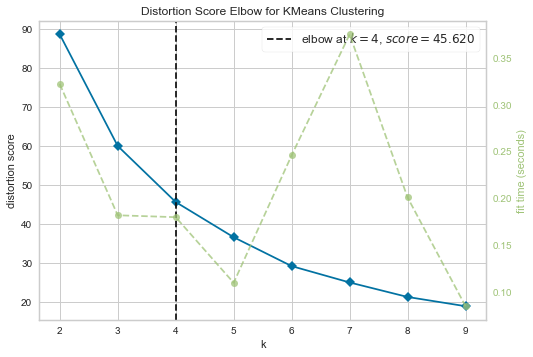

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
#Mehod elbow
model = KMeans()
vis = KElbowVisualizer(model, k = (2,10))
vis.fit(X)
vis.show()

### Build Kmean model with 4 cluster

In [53]:
km = KMeans(n_clusters=4, random_state=12)
km.fit(X)

KMeans(n_clusters=4, random_state=12)

In [61]:
rfm['cluster'] = km.labels_
rfm

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup,RFMScore,RFM_Loyalty,cluster
0,1,2020-12-23,7,152,483123.679,3,3,4,334,10,Bornze,0
1,2,2020-12-23,7,135,494281.177,3,4,4,344,11,Bornze,0
2,3,2020-12-22,8,181,669832.444,4,1,1,411,6,Gold,3
3,4,2020-12-27,3,167,728005.258,2,2,1,221,5,Platinum,3
4,5,2020-12-02,28,159,628622.360,4,2,2,422,8,Gold,2
5,6,2020-12-28,2,143,575268.164,1,4,3,143,8,Gold,0
6,7,2020-12-29,1,153,569447.905,1,3,3,133,7,Gold,0
7,8,2020-12-27,3,142,518895.424,2,4,4,244,10,Bornze,0
8,9,2020-12-24,6,171,712180.967,3,1,1,311,5,Platinum,3
9,10,2020-12-17,13,158,618229.422,4,2,2,422,8,Gold,2


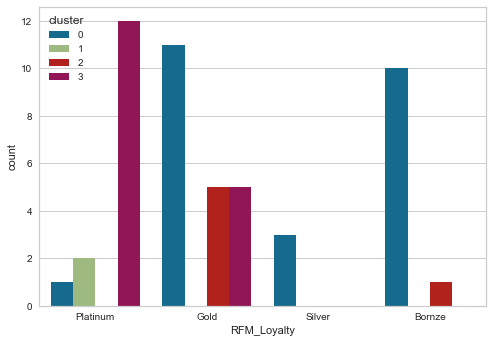

In [62]:
sns.countplot(rfm.RFM_Loyalty, hue =rfm.cluster );

In [63]:
rfm.query('cluster ==1')

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup,RFMScore,RFM_Loyalty,cluster
11,12,2020-12-29,1,210,852066.815,1,1,1,111,3,Platinum,1
28,29,2020-12-30,0,179,802890.682,1,1,1,111,3,Platinum,1


In [64]:
rfm.query('cluster ==0')

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup,RFMScore,RFM_Loyalty,cluster
0,1,2020-12-23,7,152,483123.679,3,3,4,334,10,Bornze,0
1,2,2020-12-23,7,135,494281.177,3,4,4,344,11,Bornze,0
5,6,2020-12-28,2,143,575268.164,1,4,3,143,8,Gold,0
6,7,2020-12-29,1,153,569447.905,1,3,3,133,7,Gold,0
7,8,2020-12-27,3,142,518895.424,2,4,4,244,10,Bornze,0
13,14,2020-12-27,3,157,571313.238,2,3,3,233,8,Gold,0
14,15,2020-12-28,2,142,607970.850,1,4,2,142,7,Gold,0
15,16,2020-12-29,1,135,576916.568,1,4,3,143,8,Gold,0
21,22,2020-12-28,2,140,549713.090,1,4,4,144,9,Silver,0
25,26,2020-12-21,9,153,584374.356,4,3,3,433,10,Bornze,0


In [65]:
rfm.query('cluster ==0')

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup,RFMScore,RFM_Loyalty,cluster
4,5,2020-12-02,28,159,628622.360,4,2,2,422,8,Gold,2
9,10,2020-12-17,13,158,618229.422,4,2,2,422,8,Gold,2
22,23,2020-12-20,10,164,659617.607,4,2,2,422,8,Gold,2
23,24,2020-12-09,21,151,531728.938,4,4,4,444,12,Bornze,2
33,34,2020-12-17,13,176,721526.533,4,1,1,411,6,Gold,2
49,50,2020-12-16,14,163,663903.304,4,2,2,422,8,Gold,2


In [66]:
rfm.query('cluster ==3')

,CustomerID,Last_purchases,recency,frequency,monetary,r,f,m,RFMGroup,RFMScore,RFM_Loyalty,cluster
2,3,2020-12-22,8,181,669832.444,4,1,1,411,6,Gold,3
3,4,2020-12-27,3,167,728005.258,2,2,1,221,5,Platinum,3
8,9,2020-12-24,6,171,712180.967,3,1,1,311,5,Platinum,3
10,11,2020-12-26,4,178,712004.409,3,1,1,311,5,Platinum,3
12,13,2020-12-28,2,171,636025.572,1,1,2,112,4,Platinum,3
16,17,2020-12-26,4,175,725296.821,3,1,1,311,5,Platinum,3
17,18,2020-12-26,4,186,665778.044,3,1,2,312,6,Gold,3
18,19,2020-12-29,1,165,625260.081,1,2,2,122,5,Platinum,3
19,20,2020-12-23,7,167,596110.179,3,2,3,323,8,Gold,3
20,21,2020-12-29,1,164,718200.538,1,2,1,121,4,Platinum,3
